In [1]:
from skimage import io, morphology, filters
import numpy as np

from matplotlib import pyplot as plt, cm
plt.rcParams['image.cmap'] = 'gray' # set default colormap for imshow to be gray

<class 'numpy.uint8'>
im (mean, min, max): 110.44672288516068 0 255


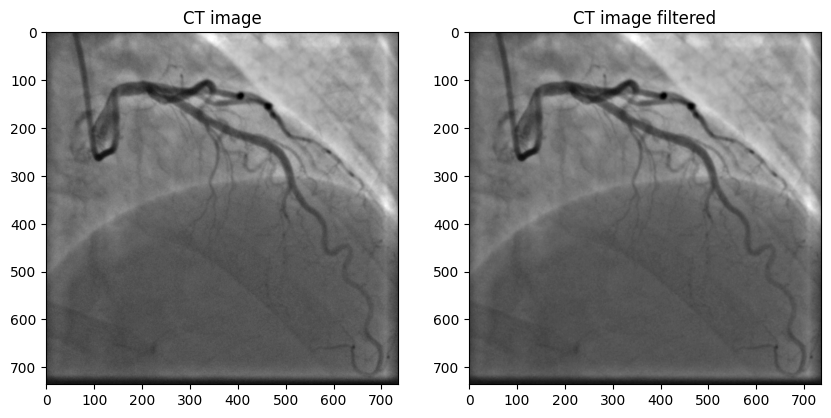

In [2]:
im = io.imread(r"C:\Users\jeppe\Desktop\Data\6\Orig\IMG00006_28.tiff")
im_lab = io.imread(r"C:\Users\jeppe\Desktop\Data\6\Annot\I6_028.tiff")
label = im_lab < 1
print(type(im[0,0]))
print("im (mean, min, max):", im.mean(), im.min(), im.max())


dskelm = morphology.disk(1)
imFilt = filters.median(im, dskelm)

fig, ax = plt.subplots(1,2, figsize=(10,5)) # figsize sets size in inches
ax[0].imshow(im)
ax[0].set_title('CT image')
ax[1].imshow(imFilt)
ax[1].set_title('CT image filtered')
plt.show()

C:\Users\jeppe\AppData\Local\Temp\ipykernel_12828\817305172.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff, residuals, rank, singularValues = np.linalg.lstsq(VanderMondeMsk, ValsMsk)


B (mean, min, max): 113.4651496303295 64.28257546317403 200.413399909156


Text(0.5, 1.0, 'Bias field corrected')

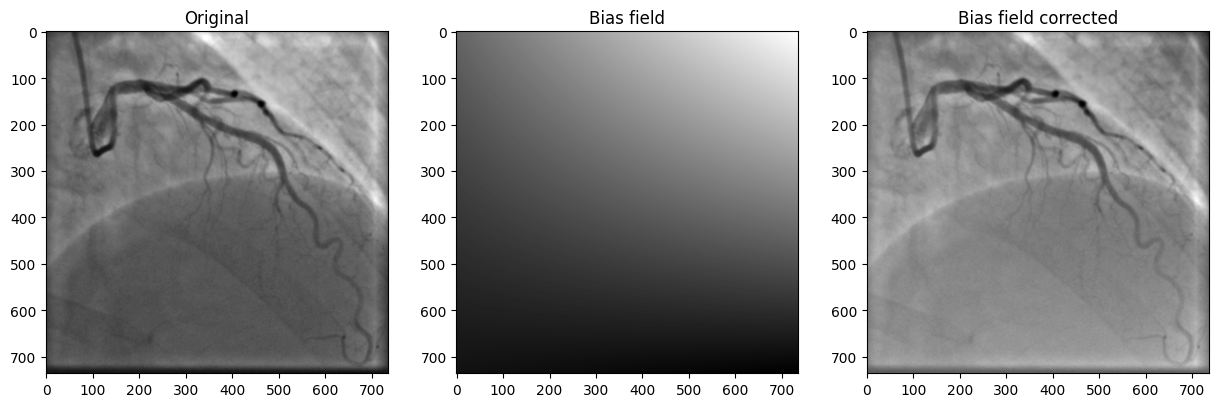

In [3]:
def biasField(I,mask):
    (rows,cols) = I.shape
    r, c = np.meshgrid(list(range(rows)), list(range(cols)))
    rMsk = r[mask].flatten()
    cMsk = c[mask].flatten()
    VanderMondeMsk = np.array([rMsk*0+1, rMsk, cMsk, rMsk**2, rMsk*cMsk, cMsk**2]).T
    ValsMsk = I[mask].flatten()
    coeff, residuals, rank, singularValues = np.linalg.lstsq(VanderMondeMsk, ValsMsk)
    VanderMonde = np.array([r*0+1, r, c, r**2, r*c, c**2]).T
    J = np.dot(VanderMonde, coeff) # @ operator is a python 3.5 feature!
    J = J.reshape((rows,cols)).T
    return(J)

B = biasField(imFilt, label)



print("B (mean, min, max):", B.mean(), B.min(), B.max())
imBias = imFilt-B+B.mean()
fig, ax = plt.subplots(1, 3, figsize=(15,5)) # figsize sets size in inches
ax[0].imshow(imFilt)
ax[0].set_title('Original')
ax[1].imshow(B)
ax[1].set_title('Bias field')
ax[2].imshow(imBias)
ax[2].set_title('Bias field corrected')